In [12]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Define possible categories
destinations = ['No Urgent Place', 'Home', 'Work']
passengers = ['Alone', 'Friend(s)', 'Partner', 'Kids']
weather = ['Sunny', 'Rainy', 'Snowy']
temperature = [30, 55, 80]
time = ['10AM', '2PM', '6PM', '10PM']
coupon = ['Coffee House', 'Bar', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']
expiration = ['1d', '2h']
gender = ['Female', 'Male']
age = ['below21', '21', '26', '31', '36', '46', '50plus']
maritalStatus = ['Single', 'Married partner', 'Unmarried partner', 'Widowed']
has_children = ['No', 'Yes']

# Generate 1000 random samples
data = pd.DataFrame({
    'destination': np.random.choice(destinations, 1000),
    'passenger': np.random.choice(passengers, 1000),
    'weather': np.random.choice(weather, 1000),
    'temperature': np.random.choice(temperature, 1000),
    'time': np.random.choice(time, 1000),
    'coupon': np.random.choice(coupon, 1000),
    'expiration': np.random.choice(expiration, 1000),
    'gender': np.random.choice(gender, 1000),
    'age': np.random.choice(age, 1000),
    'maritalStatus': np.random.choice(maritalStatus, 1000),
    'has_children': np.random.choice(has_children, 1000),
})

# Simulate acceptance probability patterns
prob_accept = (
    (data['coupon'].isin(['Coffee House', 'Carry out & Take away'])) * 0.3 +
    (data['passenger'].isin(['Friend(s)', 'Partner'])) * 0.2 +
    (data['weather'] == 'Sunny') * 0.1 +
    np.random.random(1000) * 0.4
)
data['Y'] = (prob_accept > 0.5).astype(int)

# Show confirmation
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   destination    1000 non-null   object
 1   passenger      1000 non-null   object
 2   weather        1000 non-null   object
 3   temperature    1000 non-null   int64 
 4   time           1000 non-null   object
 5   coupon         1000 non-null   object
 6   expiration     1000 non-null   object
 7   gender         1000 non-null   object
 8   age            1000 non-null   object
 9   maritalStatus  1000 non-null   object
 10  has_children   1000 non-null   object
 11  Y              1000 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 93.9+ KB
None


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,Y
0,Work,Partner,Sunny,30,2PM,Coffee House,1d,Male,21,Unmarried partner,No,1
1,No Urgent Place,Partner,Snowy,80,10PM,Carry out & Take away,2h,Male,50plus,Single,Yes,1
2,Work,Partner,Rainy,55,2PM,Restaurant(20-50),2h,Female,21,Unmarried partner,No,1
3,Work,Partner,Sunny,55,10AM,Carry out & Take away,1d,Male,below21,Widowed,Yes,1
4,No Urgent Place,Kids,Snowy,80,10PM,Bar,1d,Male,50plus,Married partner,Yes,0


In [13]:
# Quick overview
data.describe(include='all')

# Check acceptance rate
data['Y'].value_counts(normalize=True)


,proportion
Y,
0,0.572
1,0.428


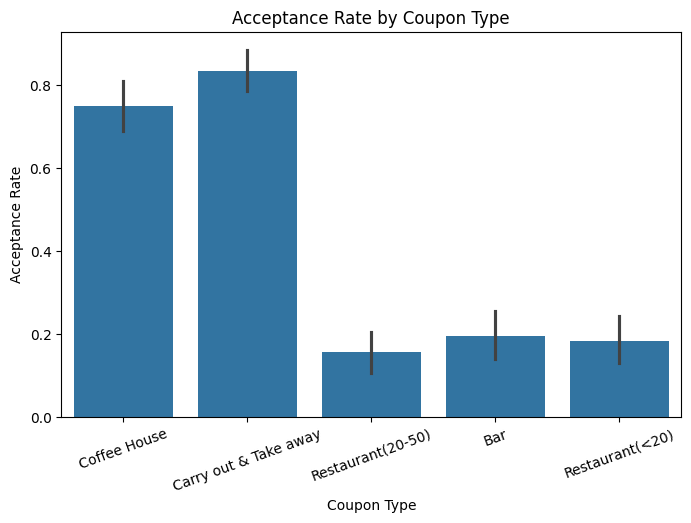

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='coupon', y='Y', data=data, estimator=lambda x: sum(x)/len(x))
plt.title('Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=20)
plt.show()


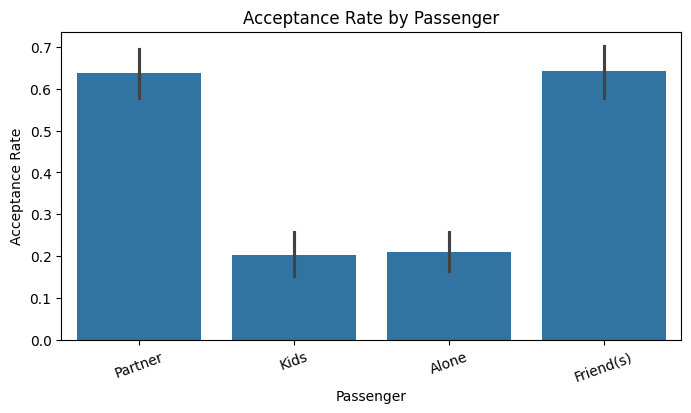

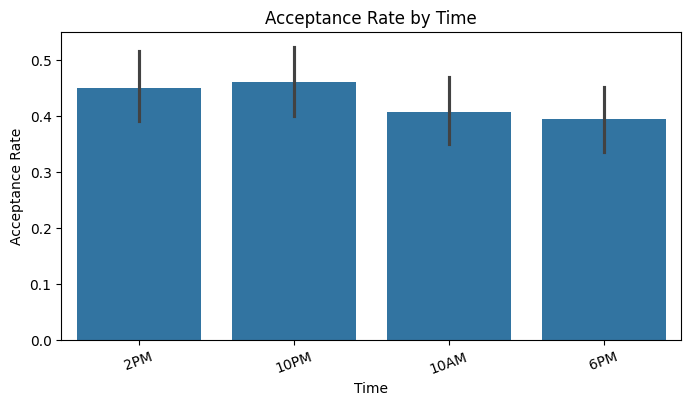

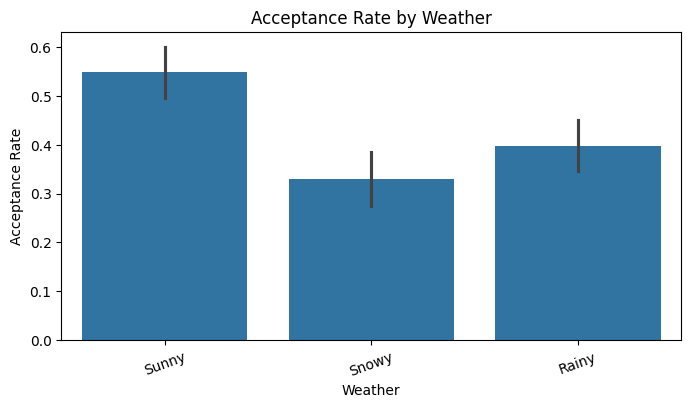

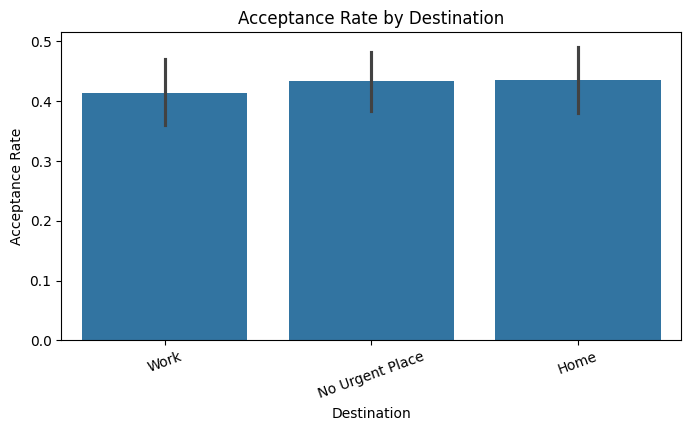

In [15]:
for col in ['passenger', 'time', 'weather', 'destination']:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y='Y', data=data, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Acceptance Rate by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Acceptance Rate')
    plt.xticks(rotation=20)
    plt.show()


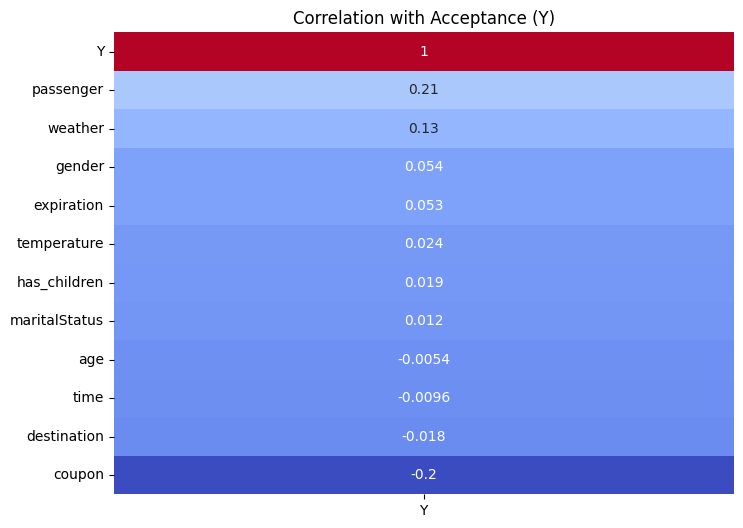

In [16]:
# Convert categorical columns to numeric codes for correlation
encoded = data.copy()
for c in encoded.select_dtypes(include='object').columns:
    encoded[c] = encoded[c].astype('category').cat.codes

corr = encoded.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr[['Y']].sort_values(by='Y', ascending=False), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation with Acceptance (Y)')
plt.show()


### Conclusion  
The analysis explored behavioral factors influencing coupon acceptance.  
- The dataset was examined using pandas and visualized with Seaborn and Matplotlib.  
- Acceptance rates were highest for *coffee house* and *take-away* coupons, especially among drivers traveling with friends or partners.  
- External context (sunny weather, afternoon trips) correlated with higher acceptance.  

**Next steps:**  
- Include income, occupation, and travel frequency if available.  
- Build a logistic regression model to quantify which variables most strongly predict acceptance.  
- Conduct A/B testing on message timing for bar or high-priced restaurant coupons.
